# EDA for Lung Cancer Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Sweden_Lung_Cancer_500.csv')
df

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_days
0,712461,64,0,2020/2/14,1,1,2,31.1,277,1,0,1,0,0,2020/10/8,0,237
1,596530,62,1,2015/6/12,3,1,1,42.7,247,0,0,0,0,2,2016/1/4,0,206
2,438359,66,0,2015/8/23,2,0,3,40.9,248,0,0,0,0,1,2016/5/14,1,265
3,809521,63,0,2019/11/16,0,1,0,41.2,246,0,0,1,1,1,2021/7/24,0,616
4,372153,74,1,2024/2/26,1,1,0,18.8,169,1,0,0,0,1,2025/3/30,1,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,355289,43,1,2017/11/29,2,1,0,29.5,193,1,0,0,0,2,2019/4/16,0,503
496,30007,51,1,2021/12/27,2,1,0,27.0,163,0,1,0,0,0,2023/4/11,1,470
497,361612,55,1,2023/1/29,1,1,0,32.2,279,1,0,0,1,0,2024/4/22,1,449
498,681455,57,1,2021/2/25,3,1,3,30.0,195,1,1,0,0,0,2022/6/18,0,478


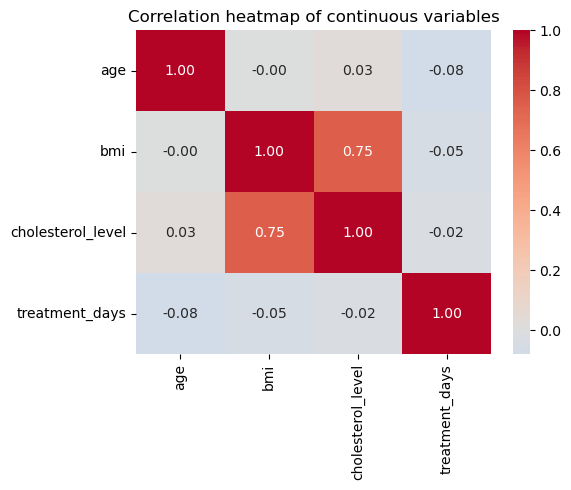

In [ ]:
# Correlation analysis among continuous covariates
num_vars = [
    "age",
    "bmi",
    "cholesterol_level",
    "treatment_days"
]

corr = df[num_vars].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation heatmap of continuous variables")
plt.tight_layout()
plt.show()


## Descriptive statistics

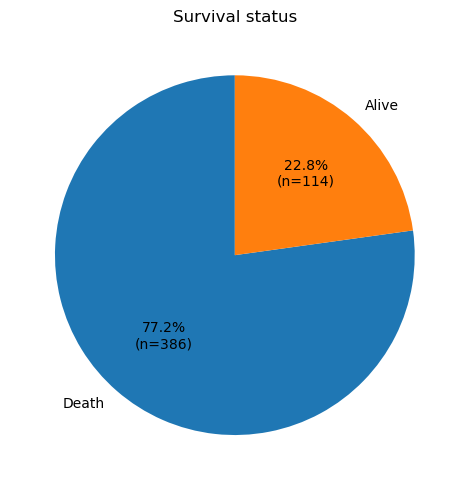

In [50]:
# survived
counts = df["survived"].value_counts().sort_index()
labels = ["Death", "Alive"]

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n(n={int(p*sum(counts)/100)})",
    startangle=90
)

plt.title("Survival status")
plt.tight_layout()
plt.show()


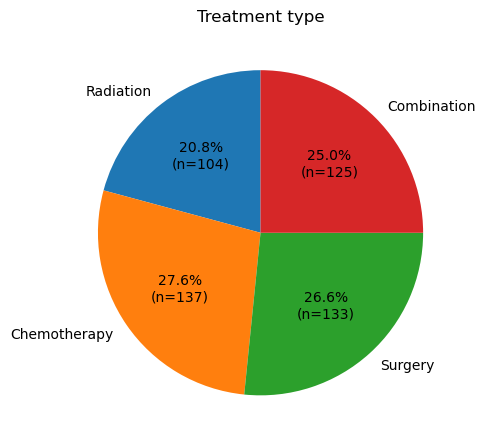

In [70]:
# treatment type
counts = df["treatment_type"].value_counts().sort_index()
labels = ["Radiation", "Chemotherapy", "Surgery", "Combination"]

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n(n={int(p*sum(counts)/100)})",
    startangle=90
)

plt.title("Treatment type")
plt.tight_layout()
plt.show()


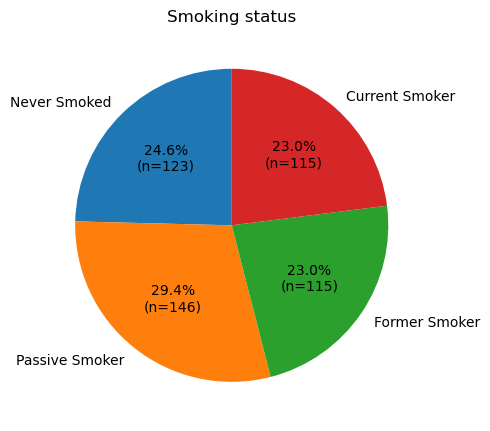

In [ ]:
# smoking status
counts = df["smoking_status"].value_counts().sort_index()
labels = ["Never Smoked", "Passive Smoker", "Former Smoker", "Current Smoker"]

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n(n={int(p*sum(counts)/100)})",
    startangle=90
)

plt.title("Smoking status")
plt.tight_layout()
plt.show()


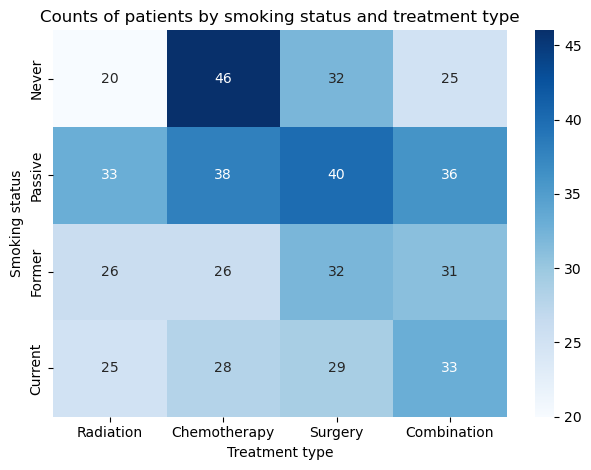

In [ ]:
# Treatment type × Smoking status

treatment_labels = {
    0: "Radiation",
    1: "Chemotherapy",
    2: "Surgery",
    3: "Combination"
}

smoking_labels = {
    0: "Never",
    1: "Passive",
    2: "Former",
    3: "Current"
}

ct = pd.crosstab(df["smoking_status"], df["treatment_type"])
ct = ct.rename(columns=treatment_labels)
ct = ct.rename(index=smoking_labels)

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Treatment type")
plt.ylabel("Smoking status")
plt.title("Counts of patients by smoking status and treatment type")
plt.tight_layout()
plt.show()


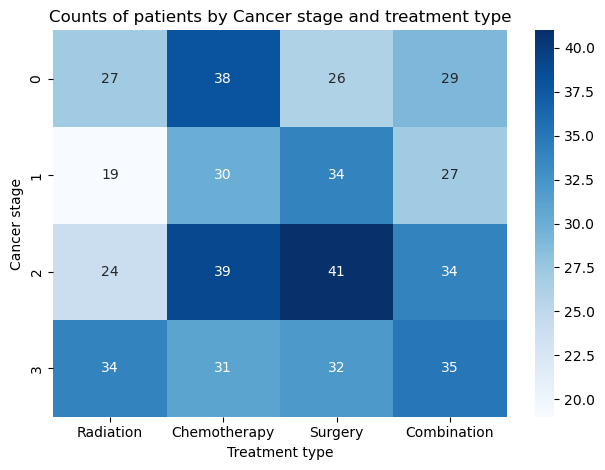

In [7]:
# Treatment type × Cancer stage

treatment_labels = {
    0: "Radiation",
    1: "Chemotherapy",
    2: "Surgery",
    3: "Combination"
}

ct = pd.crosstab(df["cancer_stage"], df["treatment_type"])
ct = ct.rename(columns=treatment_labels)

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Treatment type")
plt.ylabel("Cancer stage")
plt.title("Counts of patients by Cancer stage and treatment type")
plt.tight_layout()
plt.show()

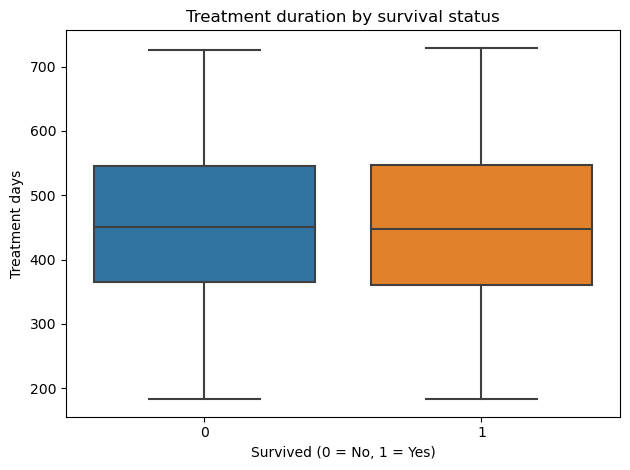

In [54]:
# Treatment days × Survived
sns.boxplot(
    data=df,
    x="survived",
    y="treatment_days"
)

plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Treatment days")
plt.title("Treatment duration by survival status")
plt.tight_layout()
plt.show()


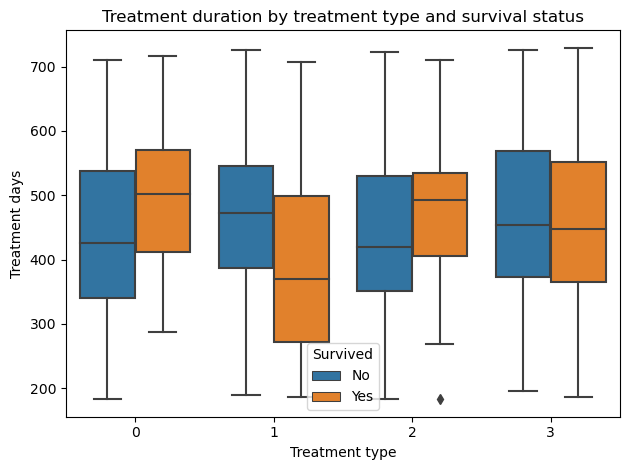

In [55]:
# Treatment days × Treatment type
ax = sns.boxplot(
    data=df,
    x="treatment_type",
    y="treatment_days",
    hue="survived"
)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles,
    ["No", "Yes"],
    title="Survived"
)

plt.xlabel("Treatment type")
plt.ylabel("Treatment days")
plt.title("Treatment duration by treatment type and survival status")
plt.tight_layout()
plt.show()

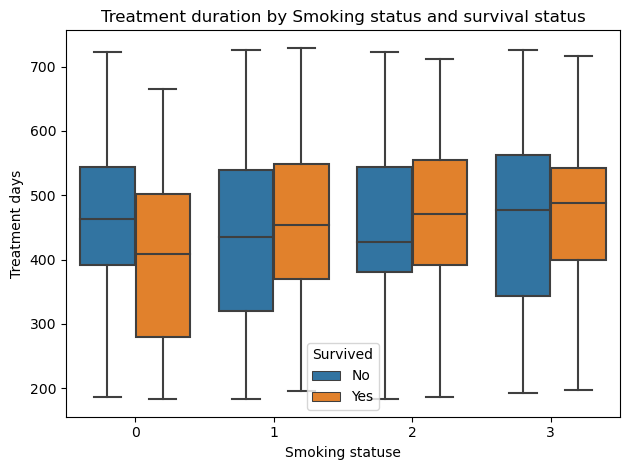

In [56]:
# Treatment days × Smoking status
ax = sns.boxplot(
    data=df,
    x="smoking_status",
    y="treatment_days",
    hue="survived"
)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles,
    ["No", "Yes"],
    title="Survived"
)

plt.xlabel("Smoking statuse")
plt.ylabel("Treatment days")
plt.title("Treatment duration by Smoking status and survival status")
plt.tight_layout()
plt.show()

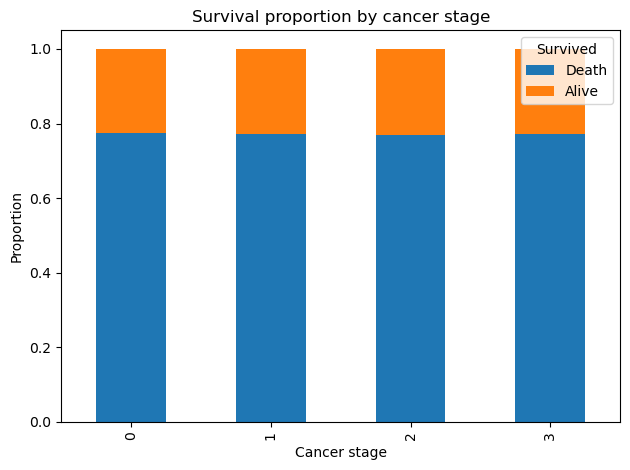

In [57]:
# survived x cancer_stage
ct = pd.crosstab(df["cancer_stage"], df["survived"], normalize="index")

ct.plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.xlabel("Cancer stage")
plt.title("Survival proportion by cancer stage")
plt.legend(title="Survived", labels=["Death", "Alive"])
plt.tight_layout()
plt.show()

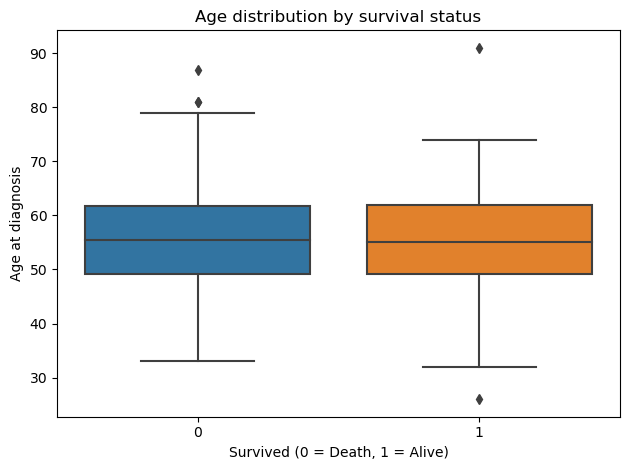

In [58]:
# age × survived
sns.boxplot(
    data=df,
    x="survived",
    y="age"
)

plt.xlabel("Survived (0 = Death, 1 = Alive)")
plt.ylabel("Age at diagnosis")
plt.title("Age distribution by survival status")
plt.tight_layout()
plt.show()


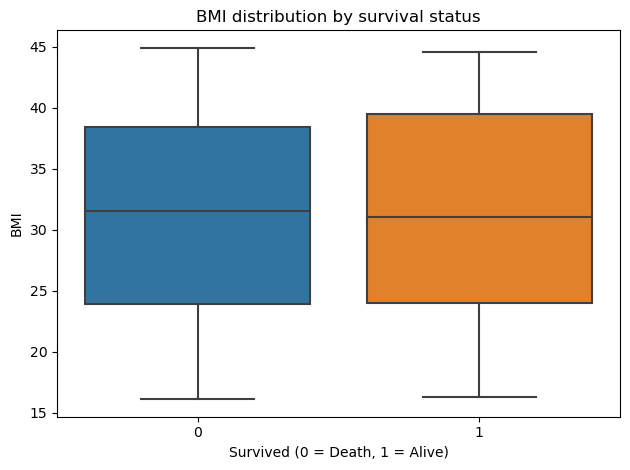

In [60]:
# BMI × survived
sns.boxplot(
    data=df,
    x="survived",
    y="bmi"
)

plt.xlabel("Survived (0 = Death, 1 = Alive)")
plt.ylabel("BMI")
plt.title("BMI distribution by survival status")
plt.tight_layout()
plt.show()


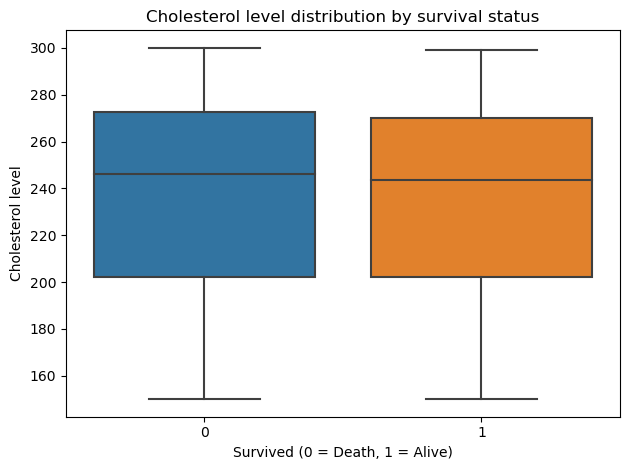

In [61]:
# Cholesterol level × survived
sns.boxplot(
    data=df,
    x="survived",
    y="cholesterol_level"
)

plt.xlabel("Survived (0 = Death, 1 = Alive)")
plt.ylabel("Cholesterol level")
plt.title("Cholesterol level distribution by survival status")
plt.tight_layout()
plt.show()


## covariate x treatment type

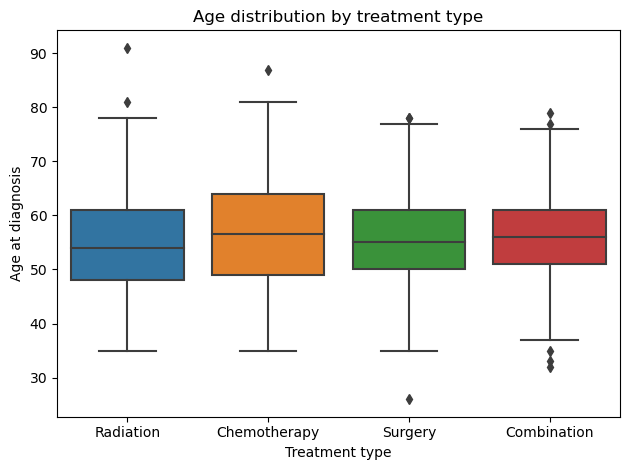

In [4]:
# Age × Treatment
ax = sns.boxplot(
    data=df,
    x="treatment_type",
    y="age",
    order=[0, 1, 2, 3]
)

ax.set_xticklabels([
    "Radiation",
    "Chemotherapy",
    "Surgery",
    "Combination"
])

plt.xlabel("Treatment type")
plt.ylabel("Age at diagnosis")
plt.title("Age distribution by treatment type")
plt.tight_layout()
plt.show()




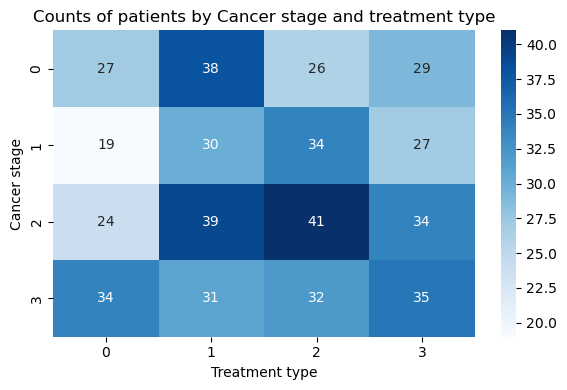

In [78]:
# Cancer stage × Treatment type

ct_stage = pd.crosstab(
    df["cancer_stage"],
    df["treatment_type"]
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    ct_stage,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Treatment type")
plt.ylabel("Cancer stage")
plt.title("Counts of patients by Cancer stage and treatment type")
plt.tight_layout()
plt.show()


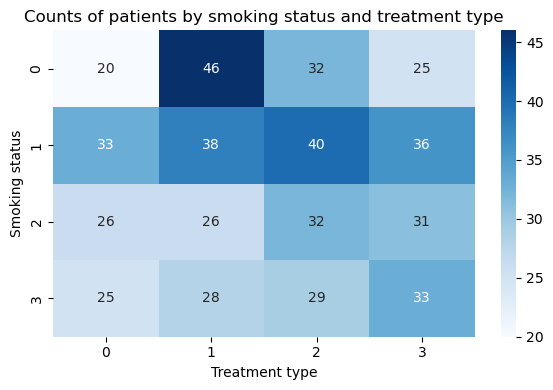

In [77]:
ct_smoke = pd.crosstab(
    df["smoking_status"],
    df["treatment_type"]
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    ct_smoke,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Treatment type")
plt.ylabel("Smoking status")
plt.title("Counts of patients by smoking status and treatment type")
plt.tight_layout()
plt.show()


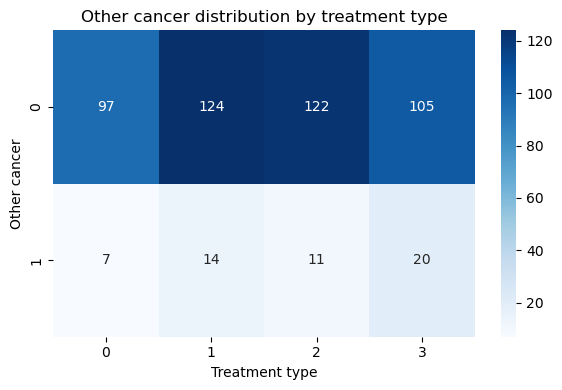

In [ ]:
# Other cancer × Treatment type
# most of them are no other cancer
ct_other = pd.crosstab(
    df["other_cancer"],
    df["treatment_type"]
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    ct_other,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Treatment type")
plt.ylabel("Other cancer")
plt.title("Other cancer distribution by treatment type")
plt.tight_layout()
plt.show()


In [81]:
2135.652-(479.626+387.482+577.257+550.129)
2597.087-(421.600+2148.572)

26.914999999999964

In [82]:
2898.296-(679.825+592.524+809.415+771.962)

44.56999999999971

In [83]:
3435.912-(597.204+2808.804)

29.903999999999996

In [87]:
df['age'].mean()
df['age'].median()

55.0

In [88]:
2921.789 -2902.128

19.661000000000058

In [90]:
import numpy as np
1-np.exp(-19.661/500)

0.03855892472824929

In [91]:
df.describe()

,id,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_days
count,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,454814.898000,55.748000,0.508000,1.5640,0.482000,1.444000,31.317000,236.580000,0.740000,0.446000,0.252000,0.104000,1.558000,0.228000,452.712000
std,246782.461865,9.475445,0.500437,1.1209,0.500176,1.096023,8.300079,41.894366,0.439074,0.497573,0.434596,0.305566,1.079336,0.419963,137.475875
min,10378.000000,26.000000,0.000000,0.0000,0.000000,0.000000,16.100000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000
25%,258753.500000,49.000000,0.000000,1.0000,0.000000,1.000000,23.900000,202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,363.500000
50%,463183.500000,55.000000,1.000000,2.0000,0.000000,1.000000,31.450000,246.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,449.500000
75%,672610.000000,62.000000,1.000000,3.0000,1.000000,2.000000,38.525000,272.000000,1.000000,1.000000,1.000000,0.000000,2.250000,0.000000,546.000000
max,889423.000000,91.000000,1.000000,3.0000,1.000000,3.000000,44.900000,300.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,729.000000
